In [ ]:
import pandas as pd


exams_result = pd.read_csv('exams.csv')
exams_result.head()

,id,diagnosis,exam_1,exam_2,exam_3,exam_4,exam_5,exam_6,exam_7,exam_8,...,exam_24,exam_25,exam_26,exam_27,exam_28,exam_29,exam_30,exam_31,exam_32,exam_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
exams_result.isnull().sum()

id             0
diagnosis      0
exam_1         0
exam_2         0
exam_3         0
exam_4         0
exam_5         0
exam_6         0
exam_7         0
exam_8         0
exam_9         0
exam_10        0
exam_11        0
exam_12        0
exam_13        0
exam_14        0
exam_15        0
exam_16        0
exam_17        0
exam_18        0
exam_19        0
exam_20        0
exam_21        0
exam_22        0
exam_23        0
exam_24        0
exam_25        0
exam_26        0
exam_27        0
exam_28        0
exam_29        0
exam_30        0
exam_31        0
exam_32        0
exam_33      419
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random


SEED = 123143
random.seed(SEED)

exams_values = exams_result.drop(columns=['id', 'diagnosis'])
diagnosis = exams_result['diagnosis']

exams_values_v1 = exams_values.drop(columns="exam_33")

X_train, X_test, y_train, y_test = train_test_split(exams_values_v1, 
                                                        diagnosis,
                                                        test_size = 0.3)



classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)
print("Classification result %.2f%%" %(classifier.score(X_test, y_test)*100))

Classification result 92.40%


In [ ]:
from sklearn.dummy import DummyClassifier


SEED = 123143
random.seed(SEED)

dummy_classifier = DummyClassifier(strategy= "most_frequent")
dummy_classifier.fit(X_train, y_train)
print("Dummy classifier result %.2f%%" %(dummy_classifier.score(X_test, y_test)*100))

Dummy classifier result 66.67%


In [18]:
from sklearn.preprocessing import StandardScaler


standardizer = StandardScaler()
standardizer.fit(exams_values_v1)
exams_values_v2 = standardizer.transform(exams_values_v1)
exams_values_v2 = pd.DataFrame(data=exams_values_v2,
                                columns=exams_values_v1.keys())

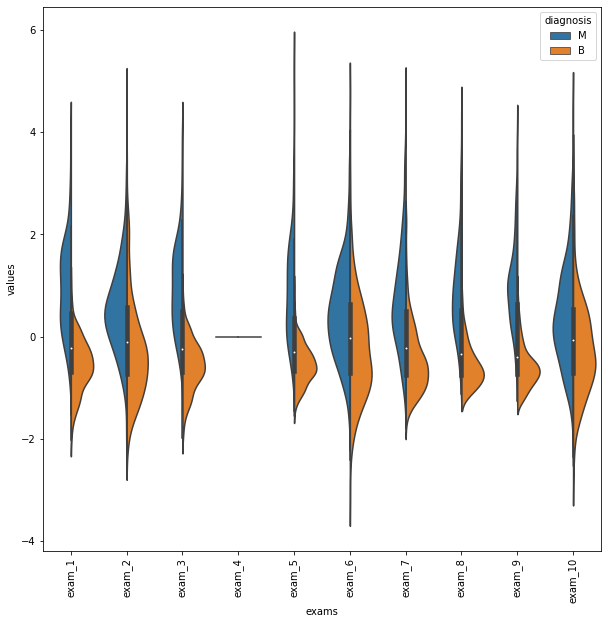

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


def violin_graph(values, start, end):
    
    data_plot = pd.concat([diagnosis, values.iloc[:,start:end]], axis = 1)
    data_plot = pd.melt(data_plot, id_vars="diagnosis",
                         var_name="exams",
                         value_name='values')
    plt.figure(figsize=(10, 10))
    sns.violinplot(x = "exams", y = "values", hue = "diagnosis",
                   data = data_plot, split= True)
    plt.xticks(rotation = 90)

violin_graph(exams_values_v2, 0, 10)

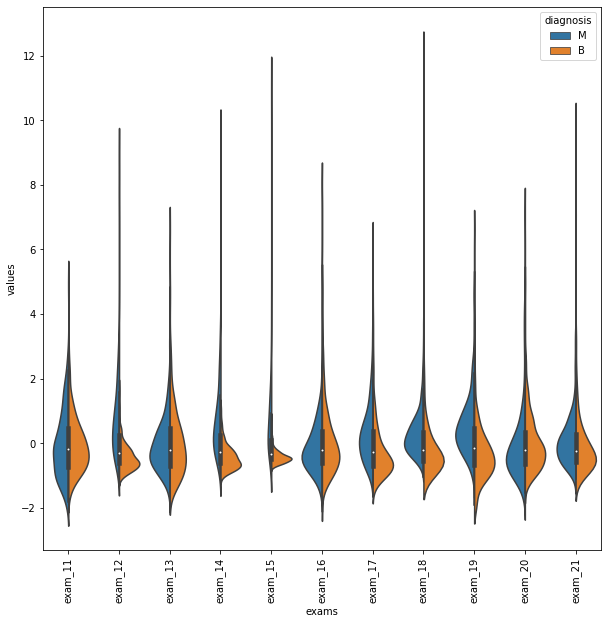

In [21]:
violin_graph(exams_values_v2, 10, 21)

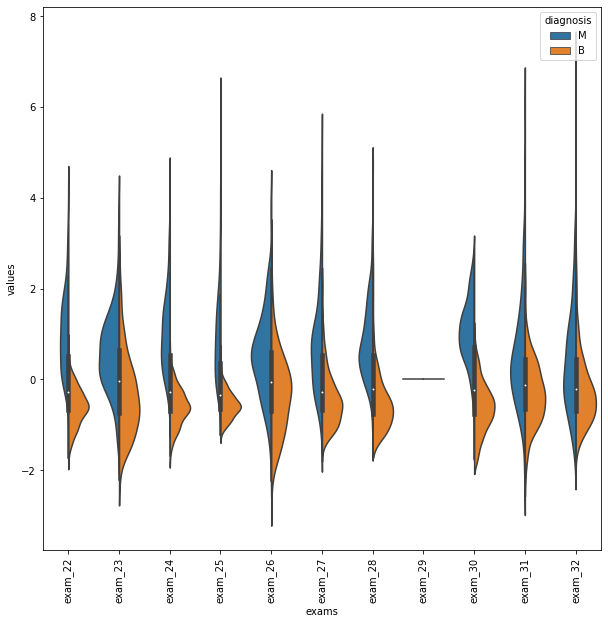

In [22]:
violin_graph(exams_values_v2, 21, 32)

In [23]:
exams_values_v3 = exams_values_v2.drop(columns=["exam_29", "exam_4"])

def classification(values):
    SEED = 1234
    random.seed(SEED)
    X_train, X_test, y_train, y_test = train_test_split(values, 
                                                        diagnosis,
                                                        test_size = 0.3)

    classifier = RandomForestClassifier(n_estimators = 100)
    classifier.fit(X_train, y_train)
    print("Classification result %.2f%%" %(classifier.score(X_test, y_test)*100))

classification(exams_values_v3)

Classification result 92.98%
